In [63]:
#load basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#load statsmodels
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

%matplotlib inline
df_diesel_price = pd.read_csv('diesel_price TES - Python.CSV', header=0, index_col=0)
df_diesel_price.head()


,Diesel_ price
DATE,
16-04-2022,7.25
17-04-2022,7.07
18-04-2022,6.25
19-04-2022,5.75
20-04-2022,5.53


Text(0, 0.5, 'Diesel Price')

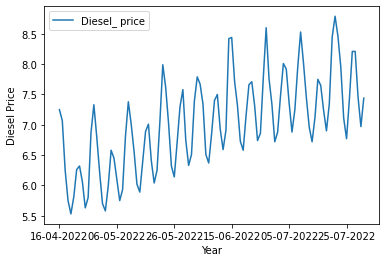

In [64]:
pl = df_diesel_price.plot()
pl.set_xlabel("Year")
pl.set_ylabel("Diesel Price")


In [65]:
#α Smoothing factor (Range  0 to 1)
alpha = 0.90
#β Trend smoothing factor (Range  0 to 1)
beta = 0.10

print("##########################################")
print("Smoothing factor :",alpha)
print("Trend smoothing factor  :",beta)
print("##########################################")


print("#################################################")
print("Adding two column for this analysis-  SES and DES")
print("#################################################")

#SES column initialization 
df_diesel_price["SES"] = 0.00

#DES column initialization
df_diesel_price["DES"] = 0.00

#DES column
df_diesel_price["SES"][0] = df_diesel_price["Diesel_ price"][0]

#SES and DES column calculations

df_diesel_price["DES"][0] = df_diesel_price["Diesel_ price"][1] - df_diesel_price["Diesel_ price"][0]
x = 1
while x < 50:
 x += 1
 for i in range(1,50):
#SES calculation 
#Lt = αYt + (1 – α)(Lt-1 + Tt-1) ==> Calculation 
    df_diesel_price["SES"][i] = alpha * df_diesel_price["Diesel_ price"][i] + (1-alpha) * (df_diesel_price["SES"][i-1] + df_diesel_price["DES"][i-1])

#DES calculation 
#Tt = β(Lt – Lt-1) + (1 – β)Tt-1 ==> Calculation    
    df_diesel_price["DES"][i] = beta * ( df_diesel_price["SES"][i] - df_diesel_price["SES"][i-1] ) + (1-beta) * df_diesel_price["DES"][i-1]

df_diesel_price["Forecast"] = 0.00

#Forecasting Calculation

for i in range(2,50):
#Yt+1 =Lt +(h)Tt
     df_diesel_price["Forecast"][i] = df_diesel_price["SES"][i-1] + df_diesel_price["DES"][i-1]
df_diesel_price.head(5)


##########################################
Smoothing factor : 0.9
Trend smoothing factor  : 0.1
##########################################
#################################################
Adding two column for this analysis-  SES and DES
#################################################


,Diesel_ price,SES,DES,Forecast
DATE,,,,
16-04-2022,7.25,7.250000,-0.180000,0.000000
17-04-2022,7.07,7.070000,-0.180000,0.000000
18-04-2022,6.25,6.314000,-0.237600,6.890000
19-04-2022,5.75,5.782640,-0.266976,6.076400
20-04-2022,5.53,5.528566,-0.265686,5.515664


In [60]:
print("###########################################################################")
print("Adding Absolute Error column for this analysis using Actuals and Forecast  ")
print("###########################################################################")
#new Absolute-Error column
df_diesel_price["Absolute-Error"] = 0.00

for i in range(1,50):
     df_diesel_price["Absolute-Error"][i] = abs(df_diesel_price["Diesel_ price"][i] - df_diesel_price["Forecast"][i] )
df_diesel_price.head(10)

###########################################################################
Adding Absolute Error column for this analysis using Actuals and Forecast  
###########################################################################


,Diesel_ price,SES,DES,Forecast,Absolute-Error
DATE,,,,,
16-04-2022,7.25,7.250000,-0.180000,0.000000,0.000000
17-04-2022,7.07,7.070000,-0.180000,0.000000,7.070000
18-04-2022,6.25,6.314000,-0.237600,6.890000,0.640000
19-04-2022,5.75,5.782640,-0.266976,6.076400,0.326400
20-04-2022,5.53,5.528566,-0.265686,5.515664,0.014336
21-04-2022,5.81,5.755288,-0.216445,5.262881,0.547119
22-04-2022,6.26,6.187884,-0.151541,5.538843,0.721157
23-04-2022,6.32,6.291634,-0.126012,6.036343,0.283657
24-04-2022,6.06,6.070562,-0.135518,6.165623,0.105623


Text(0, 0.5, 'Diesel Price')

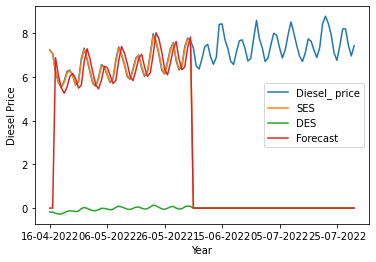

In [67]:
pl = df_diesel_price.plot()
pl.set_xlabel("Year")
pl.set_ylabel("Diesel Price")

In [154]:
#load basic libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.exponential_smoothing.ets import ETSModel
%matplotlib inline

In [155]:
#load diesel_price ETS - Python.csv file
df_diesel_price = pd.read_csv("diesel_price ETS - Python.csv", header=0, index_col=0)
df_diesel_price.head()

,Diesel price
DATE,
16-04-2022,7.25
17-04-2022,7.07
18-04-2022,6.25
19-04-2022,5.75
20-04-2022,5.53


############################################
        Diesel Price  line plot             
############################################


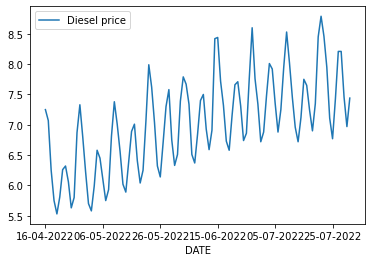

In [156]:
print("############################################")
print("        Diesel Price  line plot             ")
print("############################################")
df_diesel_price.plot()

In [157]:
df_diesel_price.index = pd.to_datetime(df_diesel_price.index)
df_diesel_price.head()

<ipython-input-157-40f7a169ecc2>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_diesel_price.index = pd.to_datetime(df_diesel_price.index)


,Diesel price
DATE,
2022-04-16,7.25
2022-04-17,7.07
2022-04-18,6.25
2022-04-19,5.75
2022-04-20,5.53


Decomposition

#####################################################
    Diesel Price - Decomposition ETS (additive)      
#####################################################


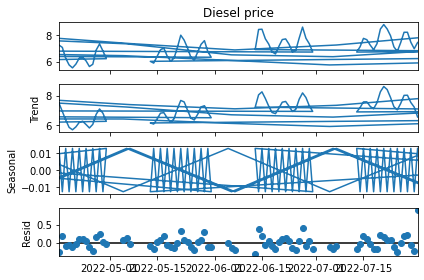

In [171]:
import statsmodels as sm
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
print("#####################################################")
print("    Diesel Price - Decomposition ETS (additive)      ")
print("#####################################################")
decomposition = sm.tsa.seasonal_decompose(df_diesel_price["Diesel price"], model = 'additive',extrapolate_trend='freq', period=2)
fig = decomposition.plot()
plt.rcParams['figure.figsize'] = [10,5]

############################################################
    Diesel Price - Decomposition ETS (multiplicative)       
############################################################


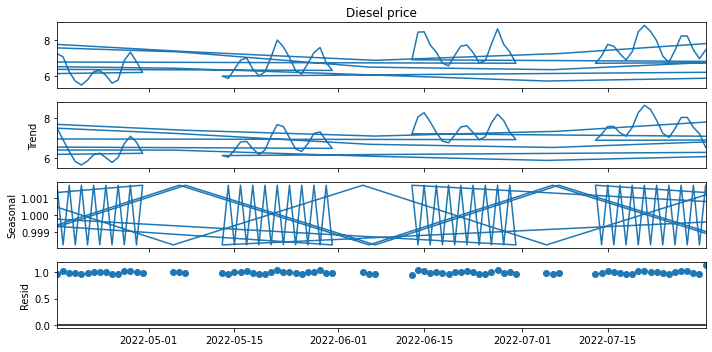

In [168]:
print("############################################################")
print("    Diesel Price - Decomposition ETS (multiplicative)       ")
print("############################################################")
decomposition = sm.tsa.seasonal_decompose(df_diesel_price["Diesel price"], model = 'multiplicative',extrapolate_trend='freq', period=2)
fig = decomposition.plot()
plt.rcParams['figure.figsize'] = [10,5]

##############################################################
    Diesel Price - Decomposition ETS (additive damped)        
##############################################################


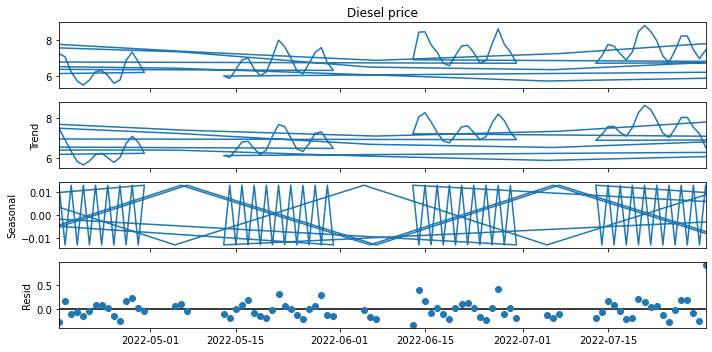

In [169]:
print("##############################################################")
print("    Diesel Price - Decomposition ETS (additive damped)        ")
print("##############################################################")
decomposition = sm.tsa.seasonal_decompose(df_diesel_price["Diesel price"], model = 'additivedamped',extrapolate_trend='freq', period=2)
fig = decomposition.plot()
plt.rcParams['figure.figsize'] = [10,5]

####################################################################
    Diesel Price - Decomposition ETS (multiplicativedamped)         
####################################################################


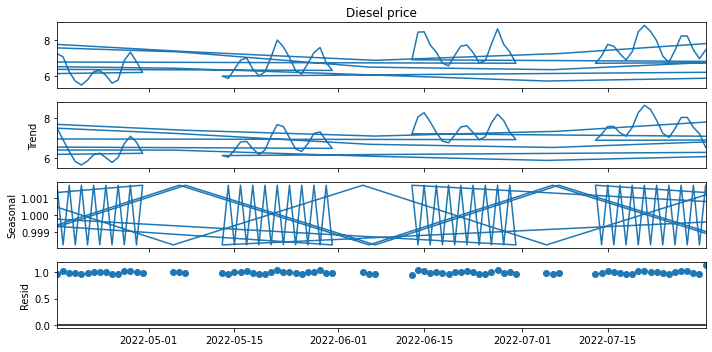

In [170]:
print("####################################################################")
print("    Diesel Price - Decomposition ETS (multiplicativedamped)         ")
print("####################################################################")
decomposition = sm.tsa.seasonal_decompose(df_diesel_price["Diesel price"], model = 'multiplicativedamped',extrapolate_trend='freq', period=2)
fig = decomposition.plot()
plt.rcParams['figure.figsize'] = [10,5]

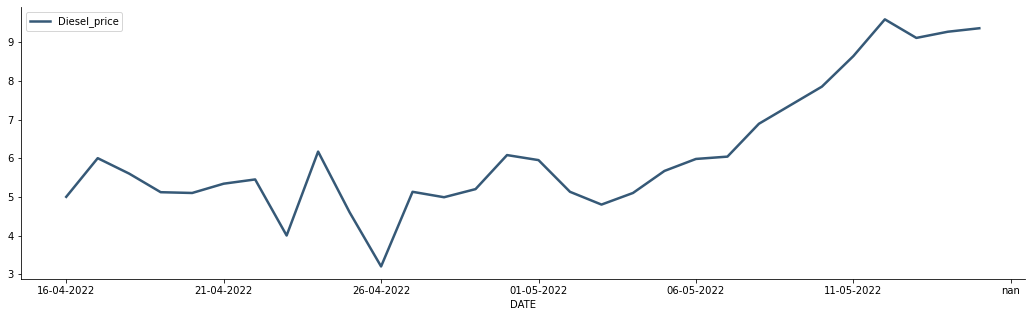

In [62]:
#load required libraries
import numpy as np
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
df_diesel_price = pd.read_csv("diesel_price EWMA - Python.csv", header=0, index_col=0)
df_diesel_price.plot()

In [65]:
print("#######################################################")
print("    Diesel Price - EWMA (alpha=0.3,0.6 and 0.9)        ")
print("#######################################################")
df_diesel_price["EWMA(0.3)"] = df_diesel_price["Diesel_price"].ewm(alpha=.3, adjust=False).mean()
df_diesel_price["EWMA(0.5)"] = df_diesel_price["Diesel_price"].ewm(alpha=.5, adjust=False).mean()
df_diesel_price["EWMA(0.9)"] = df_diesel_price["Diesel_price"].ewm(alpha=.9, adjust=False).mean()
df_diesel_price.head(5)

#######################################################
    Diesel Price - EWMA (alpha=0.3,0.6 and 0.9)        
#######################################################


,Diesel_price,EWMA(0.3),EWMA(0.5),EWMA(0.9)
DATE,,,,
16-04-2022,5.00,5.0000,5.0000,5.0000
17-04-2022,6.00,5.3000,5.5000,5.9000
18-04-2022,5.60,5.3900,5.5500,5.6300
19-04-2022,5.12,5.3090,5.3350,5.1710
20-04-2022,5.10,5.2463,5.2175,5.1071


#############################################################
    Diesel Price - EWMA (alpha=0.3,0.6 and 0.9) line plot    
#############################################################


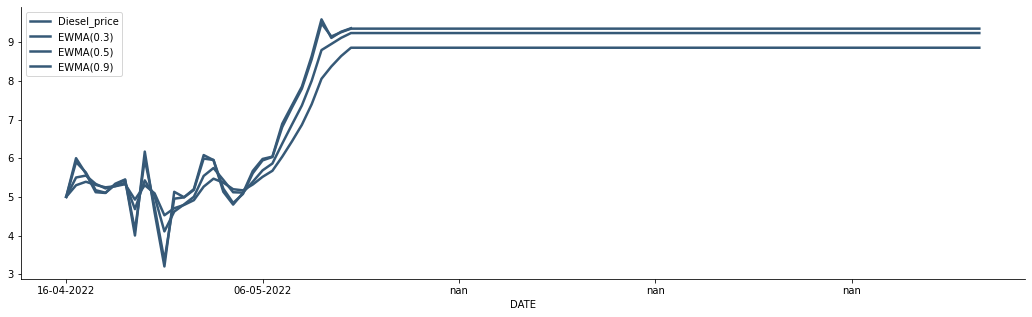

In [66]:
print("#############################################################")
print("    Diesel Price - EWMA (alpha=0.3,0.6 and 0.9) line plot    ")
print("#############################################################")
df_diesel_price.plot()

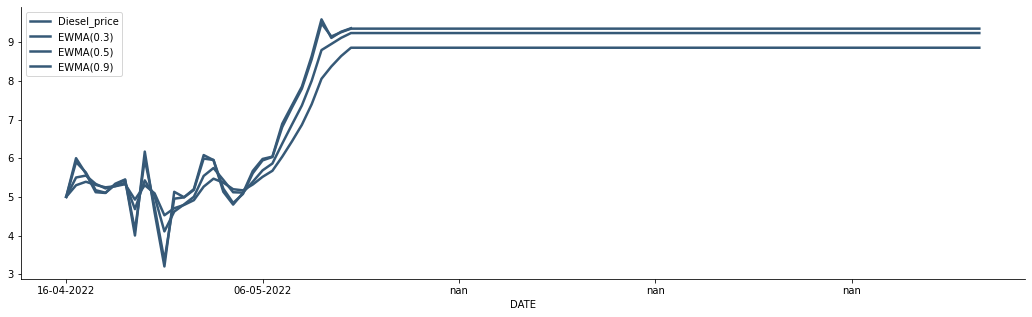

In [69]:
df_diesel_price[["Diesel_price","EWMA(0.3)","EWMA(0.5)","EWMA(0.9)"]].plot()